Consistency: Solid / Liquid

Serving Style: Uniform / Layered

Eatable Outer Layer: True / False

Spoon: True / False

Primary Ingredients: Solid Ingredients / Liquid Base

Label: Sandwich / Soup

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Wczytywanie danych treningowych
training_file_path = "food_dataset_train.csv"
data = pd.read_csv(training_file_path)

In [ ]:
# Przekształcanie danych tekstowych na numeryczne
label_encoders = {}
for column in ["Consistency", "Serving Style", "Eatable Outer Layer", "Spoon", "Primary Ingredients"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [ ]:
# Wczytujemy kolumnę "label" bezpośrednio z danych
X = data[["Consistency", "Serving Style", "Eatable Outer Layer", "Spoon", "Primary Ingredients"]]
y = data["Label"]

In [ ]:
# Tworzenie i trenowanie modelu KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

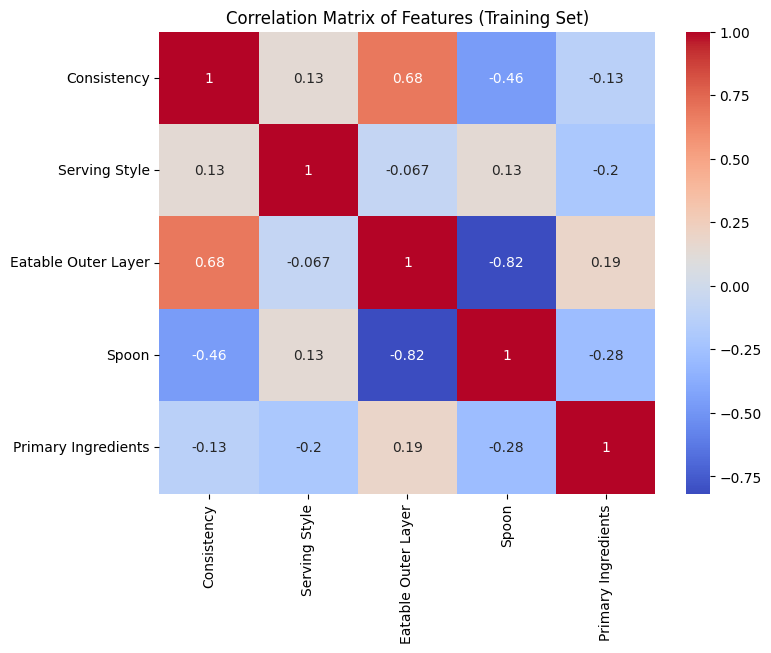

In [ ]:
# Generowanie mapy korelacji
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features (Training Set)")
plt.show()

In [ ]:
# Wczytywanie danych testowych
test_file_path = "food_dataset_test.csv"
new_test_data = pd.read_csv(test_file_path)

In [ ]:
# Przekształcanie cech testowych na numeryczne zgodnie z treningowymi encoderami
for column in ["Consistency", "Serving Style", "Eatable Outer Layer", "Spoon", "Primary Ingredients"]:
    le = label_encoders[column]
    new_test_data[column] = le.transform(new_test_data[column])

In [ ]:
# Klasyfikacja nowych przykładów
new_X_test = new_test_data[["Consistency", "Serving Style", "Eatable Outer Layer", "Spoon", "Primary Ingredients"]]
new_y_pred = knn.predict(new_X_test)

In [ ]:
# Tabela wyników klasyfikacji dla nowych danych
results_df = pd.DataFrame({
    "Food Name": new_test_data["Name"],
    "Predicted Class": new_y_pred
})

In [ ]:
# Wyświetlenie tabeli wyników klasyfikacji
print("Classification Results for New Test Data")
print(results_df)

Classification Results for New Test Data
              Food Name Predicted Class
0         Żur w chlebie            Soup
1         Smoothie bowl        Sandwich
2                Kompot            Soup
3       Chili con carne            Soup
4   Fondant czekoladowy        Sandwich
5                Galert            Soup
6                 Omlet        Sandwich
7               Eintopf            Soup
8        Pyry z gzikiem        Sandwich
9               Biryani        Sandwich
10               Żymlok        Sandwich
11                 Piwo            Soup
12               Moczka            Soup
13              Szpajza            Soup
14           Bubble Tea            Soup
15      Koktajl owocowy            Soup
16                 Taco        Sandwich
17             Pancakes        Sandwich
18           Currywurst        Sandwich
19       Shepherd's Pie        Sandwich
20            Beef Stew        Sandwich
21                Bigos            Soup


In [24]:
# Dodanie predykcji do pliku testowego i pobranie w CSV

food_test_predictions = pd.read_csv(test_file_path)

food_test_predictions["Label"] = new_y_pred

food_test_predictions.to_csv("food_test_predictions.csv", index=False)

from google.colab import files
#files.download("food_test_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model został zaprojektowany do uproszczonego podziału potraw na **zupy** i **kanapki**. Choć taki podział jest celowo naiwny, klasyfikator poradził sobie  dobrze, bazując na cechach takich jak konsystencja, sposób podania czy obecność jadalnej warstwy zewnętrznej.

Zbiór testowy celowo zawierał potrawy podchywtliwe do jednoznacznej klasyfikacji, jak np. *żur w chlebie*, który mógłby być uznany za **kanapkę** z uwagi na obecność jadalnego naczynia.

Mimo to, model wykazał spójną logikę działania, a dane wykazują potencjał do zastosowania również w klasteryzacji.